<a href="https://colab.research.google.com/github/abuwildanm/food-recognition/blob/master/Create_Tensorflow_Model_from_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Tensorflow Model from YOLO

## Download model from Google Cloud Storage

In [1]:
# Login to our GCP account
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=Q9E9UyJblI1SQ8dBoeC8z0b1Eo2eug&prompt=consent&access_type=offline&code_challenge=bVPe-hyV38RQ5K1L-KSgmbYKGozPDuzoTkWFJZwhu2o&code_challenge_method=S256

Enter verification code: 4/1AY0e-g70Nu6UKHgHaiVCYeTnpPlxO1DY0A8p-rAsE4aus91k0mimgh_b3yo

You are now logged in as [abuwildanm@gmail.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


To take a quick anonymous survey, run:
  $ gcloud survey



In [2]:
# Set project using our project ID
!gcloud config set project food-nutrition-312416

Updated property [core/project].


In [3]:
# Check the number of file in bucket
!gsutil ls gs://food-nutrition/models

gs://food-nutrition/models/yolov3/


In [4]:
# Download models from our bucket
!gsutil -m cp -r gs://food-nutrition/models .

Copying gs://food-nutrition/models/yolov3/backup/yolov3-custom_1000.weights...
Copying gs://food-nutrition/models/yolov3/backup/yolov3-custom_6000.weights...
Copying gs://food-nutrition/models/yolov3/backup/yolov3-custom_7000.weights...
Copying gs://food-nutrition/models/yolov3/backup/yolov3-custom_2000.weights...
Copying gs://food-nutrition/models/yolov3/backup/yolov3-custom_3000.weights...
Copying gs://food-nutrition/models/yolov3/backup/yolov3-custom_8000.weights...
Copying gs://food-nutrition/models/yolov3/backup/yolov3-custom_best.weights...
Copying gs://food-nutrition/models/yolov3/backup/yolov3-custom_5000.weights...
Copying gs://food-nutrition/models/yolov3/backup/yolov3-custom_final.weights...
Copying gs://food-nutrition/models/yolov3/backup/yolov3-custom_4000.weights...
Copying gs://food-nutrition/models/yolov3/backup/yolov3-custom_last.weights...
Copying gs://food-nutrition/models/yolov3/darknet53.conv.74...
Copying gs://food-nutrition/models/yolov3/food.data...
Copying gs:/

In [5]:
# Create symbolic link for yolov3 directory
!ln -s /content/models/yolov3 /yolov3

## Downgrade the Tensorflow version

In [6]:
!pip install tensorflow==2.3

     |████████████████████████████████| 320.4MB 43kB/s 
     |████████████████████████████████| 20.1MB 1.4MB/s 
     |████████████████████████████████| 460kB 32.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [7]:
!pip show tensorflow

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: wheel, termcolor, opt-einsum, gast, astunparse, tensorflow-estimator, six, absl-py, h5py, tensorboard, numpy, keras-preprocessing, scipy, google-pasta, protobuf, grpcio, wrapt
Required-by: fancyimpute


## Configure the classes names

Source: https://github.com/theAIGuysCode/tensorflow-yolov4-tflite

In [8]:
!git clone https://github.com/hunglc007/tensorflow-yolov4-tflite.git

Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 780, done.
remote: Total 780 (delta 0), reused 0 (delta 0), pack-reused 780
Receiving objects: 100% (780/780), 197.64 MiB | 31.01 MiB/s, done.
Resolving deltas: 100% (370/370), done.


In [9]:
%cd tensorflow-yolov4-tflite

/content/tensorflow-yolov4-tflite


In [10]:
!cat core/config.py

#! /usr/bin/env python
# coding=utf-8
from easydict import EasyDict as edict


__C                           = edict()
# Consumers can get config by: from config import cfg

cfg                           = __C

# YOLO options
__C.YOLO                      = edict()

__C.YOLO.CLASSES              = "./data/classes/coco.names"
__C.YOLO.ANCHORS              = [12,16, 19,36, 40,28, 36,75, 76,55, 72,146, 142,110, 192,243, 459,401]
__C.YOLO.ANCHORS_V3           = [10,13, 16,30, 33,23, 30,61, 62,45, 59,119, 116,90, 156,198, 373,326]
__C.YOLO.ANCHORS_TINY         = [23,27, 37,58, 81,82, 81,82, 135,169, 344,319]
__C.YOLO.STRIDES              = [8, 16, 32]
__C.YOLO.STRIDES_TINY         = [16, 32]
__C.YOLO.XYSCALE              = [1.2, 1.1, 1.05]
__C.YOLO.XYSCALE_TINY         = [1.05, 1.05]
__C.YOLO.ANCHOR_PER_SCALE     = 3
__C.YOLO.IOU_LOSS_THRESH      = 0.5


# Train options
__C.TRAIN                     = edict()

__C.TRAIN.ANNOT_PATH          = "./data/dataset/val2017.txt"
__C.TRAIN.BATCH_SIZE

In [11]:
!sed -i 's|__C.YOLO.CLASSES              = "./data/classes/coco.names"|__C.YOLO.CLASSES              = "/yolov3/food.names"|' core/config.py

In [12]:
!cat core/config.py

#! /usr/bin/env python
# coding=utf-8
from easydict import EasyDict as edict


__C                           = edict()
# Consumers can get config by: from config import cfg

cfg                           = __C

# YOLO options
__C.YOLO                      = edict()

__C.YOLO.CLASSES              = "/yolov3/food.names"
__C.YOLO.ANCHORS              = [12,16, 19,36, 40,28, 36,75, 76,55, 72,146, 142,110, 192,243, 459,401]
__C.YOLO.ANCHORS_V3           = [10,13, 16,30, 33,23, 30,61, 62,45, 59,119, 116,90, 156,198, 373,326]
__C.YOLO.ANCHORS_TINY         = [23,27, 37,58, 81,82, 81,82, 135,169, 344,319]
__C.YOLO.STRIDES              = [8, 16, 32]
__C.YOLO.STRIDES_TINY         = [16, 32]
__C.YOLO.XYSCALE              = [1.2, 1.1, 1.05]
__C.YOLO.XYSCALE_TINY         = [1.05, 1.05]
__C.YOLO.ANCHOR_PER_SCALE     = 3
__C.YOLO.IOU_LOSS_THRESH      = 0.5


# Train options
__C.TRAIN                     = edict()

__C.TRAIN.ANNOT_PATH          = "./data/dataset/val2017.txt"
__C.TRAIN.BATCH_SIZE       

## Convert YOLO model to Tensorflow model

In [13]:
# Convert darknet weights to tensorflow model
!python save_model.py --weights /yolov3/backup/yolov3-custom_5000.weights --output /content/models/tensorflow/yolov3-custom --input_size 416 --model yolov3

2021-05-24 03:01:59.524906: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-24 03:02:01.569260: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-24 03:02:01.634918: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-24 03:02:01.635558: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-24 03:02:01.635598: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-24 03:02:01.859670: I tensorflow/stream_executor/platform/default

In [14]:
!ls /content/models/tensorflow/yolov3-custom

assets	saved_model.pb	variables


In [15]:
# Save tf model for tflite converting
!python save_model.py --weights /yolov3/backup/yolov3-custom_5000.weights --output /content/models/tflite/yolov3-custom --input_size 416 --model yolov3 --framework tflite

# Convert tensorflow model to tflite model (floating points: 32)
!python convert_tflite.py --weights /content/models/tflite/yolov3-custom --output /content/models/tflite/yolov3-custom-fp32.tflite --quantize_mode float32

# Convert tensorflow model to tflite model (floating points: 16)
!python convert_tflite.py --weights /content/models/tflite/yolov3-custom --output /content/models/tflite/yolov3-custom-fp16.tflite --quantize_mode float16

2021-05-24 03:02:51.291989: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-24 03:02:52.563206: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-24 03:02:52.595028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-24 03:02:52.595721: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-24 03:02:52.595764: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-24 03:02:52.597522: I tensorflow/stream_executor/platform/default

## Run the Tensorflow model

In [18]:
def imshow(path):
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    image = plt.imread(path)
    
    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(image)
    plt.show()

In [16]:
# Run yolov3 tensorflow model
!python detect.py --weights /content/models/tensorflow/yolov3-custom --size 416 --model yolov3 --image /content/test1.jpg --output /content/result-tf.jpg

2021-05-24 03:04:29.175124: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-24 03:04:30.426757: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-24 03:04:30.458368: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-24 03:04:30.459051: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-24 03:04:30.459092: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-24 03:04:30.466648: I tensorflow/stream_executor/platform/default

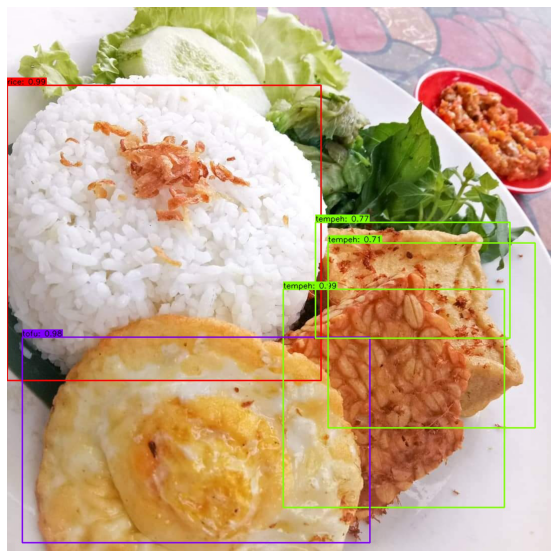

In [19]:
imshow('/content/result-tf.jpg')

In [17]:
# Run tflite model
!python detect.py --weights /content/models/tflite/yolov3-custom-fp32.tflite --size 416 --model yolov3 --image /content/test1.jpg --output /content/result-tflite.jpg --framework tflite

2021-05-24 03:04:52.408972: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-24 03:04:53.678437: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-24 03:04:53.717395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-24 03:04:53.717977: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-24 03:04:53.718016: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-24 03:04:53.719926: I tensorflow/stream_executor/platform/default

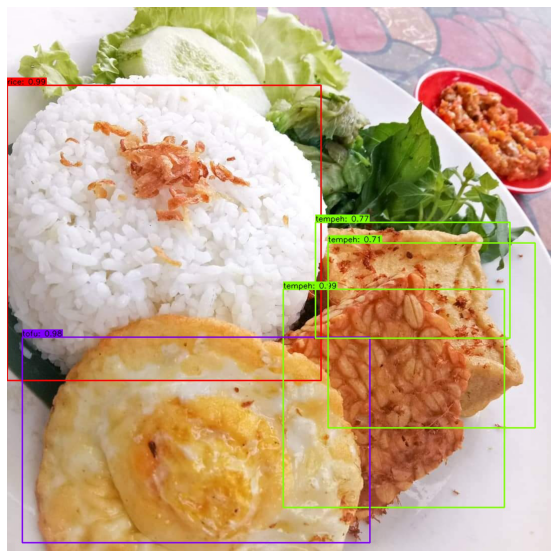

In [20]:
imshow('/content/result-tflite.jpg')

## Try run the model using Tensorflow

### Test the Tensorflow model

In [23]:
%cd /content/

/content


In [25]:
import tensorflow as tf
from tensorflow.keras.models import save_model, load_model

# Read the model
model = load_model('/content/models/tensorflow/yolov3-custom')
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 416, 416, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 416, 416, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
tf_op_layer_LeakyRelu (TensorFl (None, 416, 416, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [34]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Read the image
image = load_img('/content/test1.jpg')
# Convert image to array
img_array = img_to_array(image)
# Resize the image
img_array = tf.image.resize(img_array, (416,416))
# Add dimension to image
img_array = tf.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predictions

array([], shape=(1, 0, 8), dtype=float32)

## Upload the model to Google Cloud Storage

In [35]:
# Upload the models to our bucket
!gsutil -m cp -r /content/models gs://food-nutrition/

Copying file:///content/models/tflite/yolov3-custom-fp32.tflite [Content-Type=application/octet-stream]...
Copying file:///content/models/tensorflow/yolov3-custom/saved_model.pb [Content-Type=application/octet-stream]...
Copying file:///content/models/tflite/yolov3-custom-fp16.tflite [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite object